<pre> 
 Copyright 2018-2019 University of Padua, Italy

 Licensed under the Apache License, Version 2.0 (the "License");
 you may not use this file except in compliance with the License.
 You may obtain a copy of the License at

     http://www.apache.org/licenses/LICENSE-2.0

 Unless required by applicable law or agreed to in writing, software
 distributed under the License is distributed on an "AS IS" BASIS,
 WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
 See the License for the specific language governing permissions and
 limitations under the License.

 Author: Nicola Ferro (ferro@dei.unipd.it)
 Author: Maria Maistro (maistro@dei.unipd.it)
</pre>

<h1>Configuration of the script</h1>

<p>Configure the script as follows:</p>
<ul>
    <li><code>qrels_file</code>: path to the text file containing the qrels/pool;</li>
    <li><code>run_file</code>: path to the text file containing the run to evaluate.</li>
</ul>


In [1]:
%matplotlib inline

In [15]:
import mamba
import matplotlib.pyplot as plt

# set the dimension of the figures
plt.rcParams['figure.figsize'] = [10, 10]

plt.rcParams['font.size'] = 14

In [3]:
# path to the qrels
qrels_file = "../../data/collection/CLEF2009-Monolingual-Persian/pool/AH-PERSIAN-CLEF2009.txt"

# path to the run
run_file = "../../data/collection/CLEF2009-Monolingual-Persian/runs/JHUFA4R100TD.txt"

# the index of the topic whose Precision-Recall graph has to be plotted
# rembember that indexes in Python are 0-based
tpc = 7

# the last rank position to be considered for the given topic
# remember that usually runs retrieve 1,000 documents per topics but, in some cases, it might be less.
K = 1000

<h1>Importing a run</h1>

<p>Use <code>mamba.import_run</code> to import the run.</p>


In [4]:
run = mamba.import_run(run_file)

<h1>Importing qrels</h1>

<p>Use <code>mamba.import_qrels</code> to import the qrels.</p>

In [5]:
qrels, rb = mamba.import_qrels(qrels_file)

<h1>Assessing the run</h1>

<p>Use <code>mamba.assess_run</code> to assess the <code>run</code> with respect to the <code>qrels</code>.</p>

In [6]:
jrun = mamba.assess_run(run, qrels)        

<h1>Computing Precision up to each of the first K rank positions</h1>

<p>Use <code>mamba.precision</code> to compute precision up to each of the first K rank positions.</p>

In [7]:
# precision at the different cut-offs
p = []

for k in range(1, K):
    
    # compute the precision at the given cut-off for all the topics 
    tmp = mamba.precision(jrun, k)
    
    # append to the list the value of precision for the selected topic, i.e tmp[tpc]
    # remember that each value in the list is a tuple (topic_id, score) 
    # and thus extract the second element of the tuple, i.e tmp[tpc][1]
    p.append(tmp[tpc][1])
     

<h1>Computing Recall up to each of the first K rank positions</h1>

<p>Use <code>mamba.recall</code> to compute recall up to each of the first K rank positions.</p>

In [8]:
# recall at the different cut-offs
r = []

for k in range(1, K):
    
    # compute the recall at the given cut-off for all the topics 
    tmp = mamba.recall(jrun, rb, k)
    
    # append to the list the value of recall for the selected topic, i.e tmp[tpc]
    # remember that each value in the list is a tuple (topic_id, score) 
    # and thus extract the second element of the tuple, i.e tmp[tpc][1]
    r.append(tmp[tpc][1])
     

<h1>Plotting the Precision-Recall graph</h1>

<p>Use <code>mamba.recall</code> to compute precision up to the first 100 rank positions.</p>

(0, 1.05)

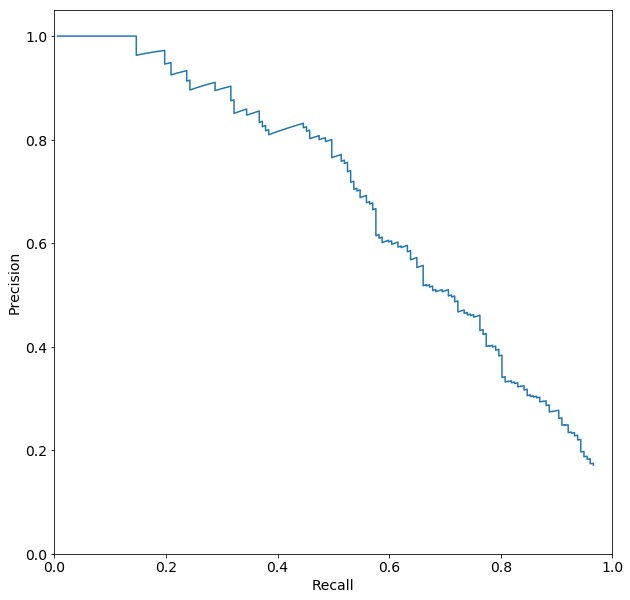

In [20]:
plt.plot(r, p)

plt.xlabel('Recall')
plt.ylabel('Precision')

axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([0,1.05])

